<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Previs%C3%A3o_de_Ado%C3%A7%C3%A3o_de_Animais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Adoção de Animais**
---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)

![img](https://image.freepik.com/vetores-gratis/adote-um-conceito-de-animal-de-estimacao-com-caes-e-gatos_23-2148519821.jpg)

## **O Problema enfrentado em um Abrigo de Animais**

Uma realidade difícil de ignorar é a quantidade de animais sem nenhuma proteção ou cuidado.

Independente de ser no Brasil ou qualquer outro lugar, essas pobres criaturas estão em número alarmantes e, por falta de políticas públicas muitas vezes, acabam mortos, em estados precários ou sendo sacrificados para que haja controle.

Muito por causa disso, há campanhas como as de **não compre animais, adote-os**, para tentar diminuir a reprodução para venda de animais "de raça", enquanto muitos outros padecem sem nunca terem tido chance de um lar para ser cuidado e amado.

O Centro de Animais de Austin, no Texas (Estados Unidos) abriga cerca de 16 mil animais anualmente, independente da raça, idade ou estado de saúde. Como meta, o centro objetiva destinar animais para algum lar seja por meio de adoção, assistência social ou grupos de resgate. Infelizmente, por ser um número muito alto,sacrificar alguns desses animais ainda é uma realidade.

Como meta, o Centro tenta chegar a uma taxa acima dos 90% de saída desses animais com vida.


## Aquisição dos Dados

Os dados foram disponibilizados pelo [Austin Animal Center](http://www.austintexas.gov/content/austin-animal-center) e podem ser baixados diretamente no [City of Austin Open Data Portal](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238).

O *dataset* usado neste *notebook* tem atualização constante e foi atualizado em 26 de fevereiro de 2021 e contém **124K linhas** e **12 colunas**.

## Dicionário de variáveis


* `Animal ID` - ID do Animal
* `Name` - Nome do Animal
* `DateTime` - Data da Chegada do Animal
* `MonthYear` - Mês e Ano da Chegada 
* `Date of Birth` - Data do Nascimento   
* `Outcome Type` - Tipo de Saída (Ex. Adoção)
* `Outcome Subtype` - Espécie de Motivo da Saída (Ex. Se por furto, razão médica etc.)
* `Animal Type` - Tipo do animal (Ex. Gato ou Cachorro)
* `Sex upon Outcome` - Sexo do Animal
* `Age upon Outcome` - Idade na Saída
* `Breed` - Raça do Animal (Ex. Golden Retriever - Cachorro)
* `Color` - Cor do Animal



Este Notebook está baseado em um trabalho feito pelo [Sigmoidal](https://sigmoidal.ai/) na *Escola Data Science*.

## Sobre o Projeto

Analisaremos as saídas desses animais, buscando identificar um 
padrão de adoção, para que ao final ajude a:

1. Planejar compras de insumos (remédios, comida etc);
2. Contratar de funcionários e colaboradores; e
3. Fazer campanhas visando otimizar a adoção de animais.

**Importando as bibliotecas necessárias**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**Importando os dados**

In [2]:
PATH = 'https://raw.githubusercontent.com/amadords/data/main/abrigo-animais.csv'
df = pd.read_csv(PATH)

**Convertendo a coluna com datas em `datetime`**

In [3]:
df.DateTime = pd.to_datetime(df.DateTime)

**Visualizando as cinco primeiras linhas**

In [4]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


## **Análise Exploratória**

**Resumo estatístico para variáveis numéricas**

In [5]:
df.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,124374,85374,124374,124374,124374,124355,57256,124374,124373,124373,124374,124374
unique,111203,19761,102811,102811,7096,9,23,5,5,52,2630,598
top,A721033,Max,2016-04-18 00:00:00,04/18/2016 12:00:00 AM,04/21/2014,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,561,39,39,117,55279,30792,70442,43753,22111,31325,13053
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-02-26 18:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Resumo estatístico para variáveis categóricas**

In [6]:
df.describe(include = 'O')

,Animal ID,Name,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,124374,85374,124374,124374,124355,57256,124374,124373,124373,124374,124374
unique,111203,19761,102811,7096,9,23,5,5,52,2630,598
top,A721033,Max,04/18/2016 12:00:00 AM,04/21/2014,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,561,39,117,55279,30792,70442,43753,22111,31325,13053


**Tipo das variáveis e se há valores faltantes**

> Veja que `Name` e `Outcome Subtype` têm valores faltantes, assim como `Sex upon Outcome` e `Age upon Outcome`, embora em menor quantidade.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124374 entries, 0 to 124373
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         124374 non-null  object        
 1   Name              85374 non-null   object        
 2   DateTime          124374 non-null  datetime64[ns]
 3   MonthYear         124374 non-null  object        
 4   Date of Birth     124374 non-null  object        
 5   Outcome Type      124355 non-null  object        
 6   Outcome Subtype   57256 non-null   object        
 7   Animal Type       124374 non-null  object        
 8   Sex upon Outcome  124373 non-null  object        
 9   Age upon Outcome  124373 non-null  object        
 10  Breed             124374 non-null  object        
 11  Color             124374 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 11.4+ MB


**Somando os valores faltantes**

In [8]:
df.isnull().sum()

Animal ID               0
Name                39000
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           19
Outcome Subtype     67118
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        1
Breed                   0
Color                   0
dtype: int64

**Quais os tipos de saídas possíveis e qual a contagem**

> Veja que, em grande maioria, os animais foram adotados, transferidos ou voltaram para seus donos.

In [9]:
df['Outcome Type'].value_counts()

Adoption           55279
Transfer           36694
Return to Owner    21504
Euthanasia          8368
Died                1156
Rto-Adopt            695
Disposal             568
Missing               69
Relocate              22
Name: Outcome Type, dtype: int64

**Visualizando apenas adoção e retornos aos donos**

In [10]:
adoptions_df = df[(df['Outcome Type'] == 'Adoption')]
adoptions_df['outcomeCount'] = 1

adoptions_df = adoptions_df[['DateTime', 'outcomeCount']]
adoptions_df = adoptions_df.set_index('DateTime').sort_index()
adoptions_df.head(3)

,outcomeCount
DateTime,
2013-10-01 09:31:00,1
2013-10-01 11:42:00,1
2013-10-01 11:53:00,1


**Datas mínimas e máximas**

In [11]:
print('A data mínima é: ', adoptions_df.index.min())
print('A data máxima é: ',  adoptions_df.index.max())

A data mínima é:  2013-10-01 09:31:00
A data máxima é:  2021-02-26 15:21:00


**Gráfico de adoção diária**

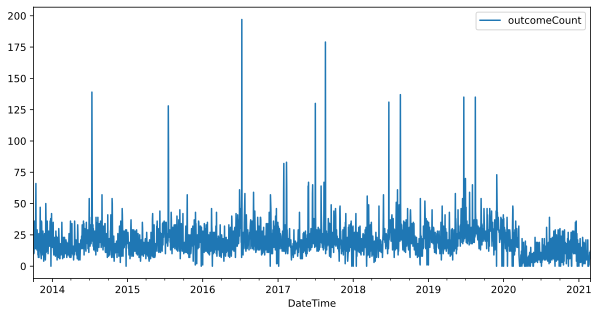

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('D').sum().plot(ax=ax)
plt.show()

**Gráfico de adoção semanal**

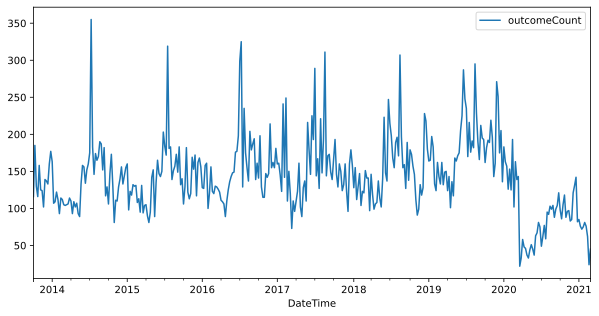

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('W').sum().plot(ax=ax)
plt.show()

## **Forecasting com Prophet**

> O **Prophet** é um projeto do **Facebook** que surgiu para resolver problemas internos da empresas, contudo se tornou *open source* e a documentação pode ser visualizada [aqui](https://facebook.github.io/prophet/).

> A biblioteca precisa de apenas duas variáveis para trabalhar as previsões:

- `ds`: Contendo a data.
- `y`: Contendo o valor numérico alvo da previsão.

> Vamos trabalhar com os dados diários.


### **Modelo Diário**

**Criando o dataframe com as variáveis `ds` e `y`**

In [14]:
prophet_df = adoptions_df.resample('D').sum().reset_index().rename(columns={'DateTime':'ds', 'outcomeCount':'y'})
prophet_df.head()

,ds,y
0,2013-10-01,11
1,2013-10-02,16
2,2013-10-03,10
3,2013-10-04,11
4,2013-10-05,36


**Criando o modelo**

In [15]:
# instanciando e treinando o modelo
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(prophet_df)

# determinando o período de dias para previsão
future = model.make_future_dataframe(periods=365)

# realizando a previsão para o período estabelecido
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Visualizandos as previsões**

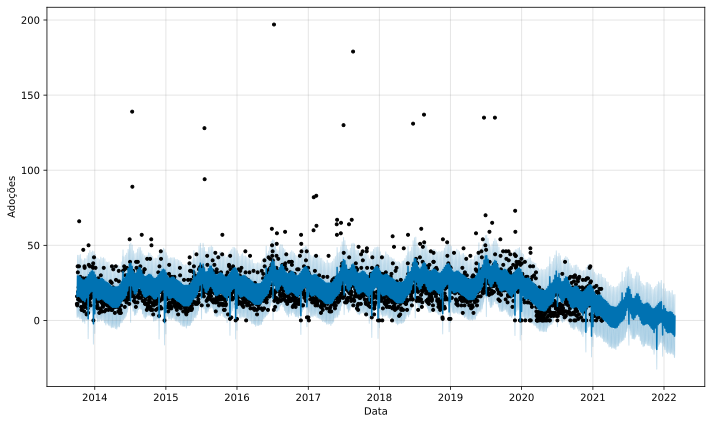

In [16]:
model.plot(forecast, xlabel='Data', ylabel='Adoções');

**Decompondo o modelo**

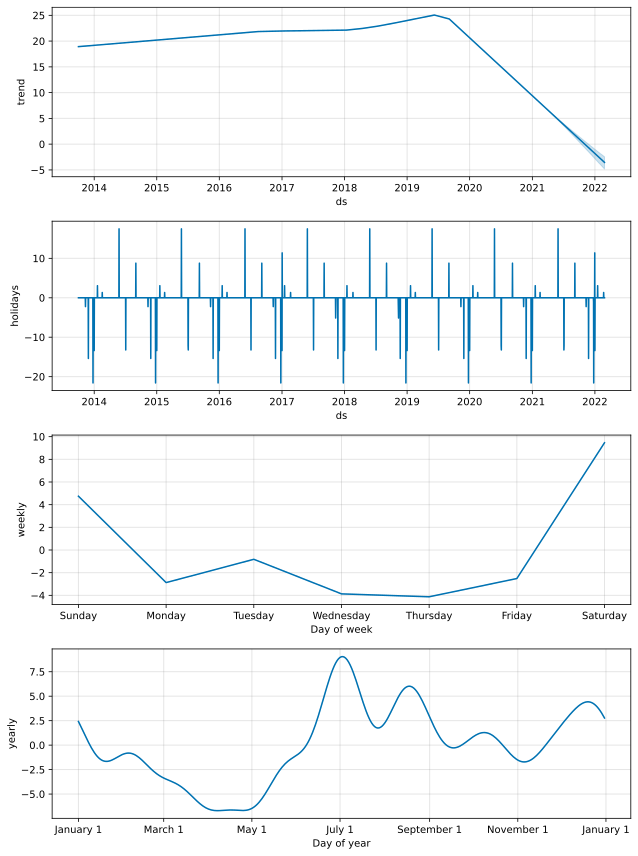

In [17]:
model.plot_components(forecast);

### **Modelo Semanal**

In [18]:

# criando um modelo baseado em semanas
prophet_df2 = adoptions_df.resample('W').sum().reset_index().rename(columns={'DateTime':'ds', 'outcomeCount':'y'})

# instanciando e treinando o modelo
model2 = Prophet()
model2.add_country_holidays(country_name='US')
model2.fit(prophet_df2)

# determinando o período de dias para previsão
future2 = model2.make_future_dataframe(periods=52)

# realizando a previsão para o período estabelecido
forecast2 = model2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Visualizando as previsões**

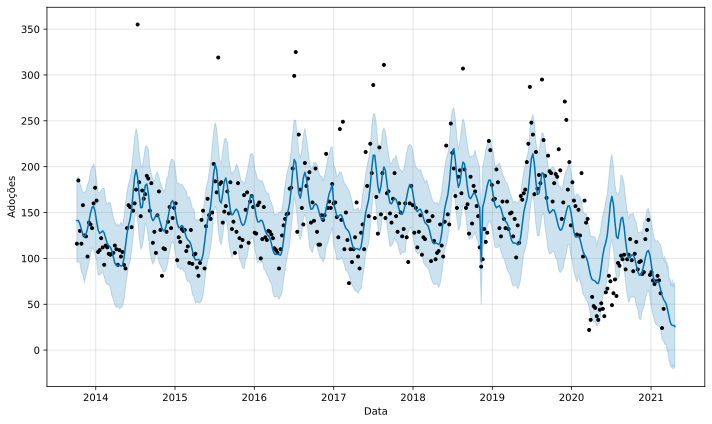

In [19]:
model2.plot(forecast2, xlabel='Data', ylabel='Adoções');

**Decompondo o modelo**

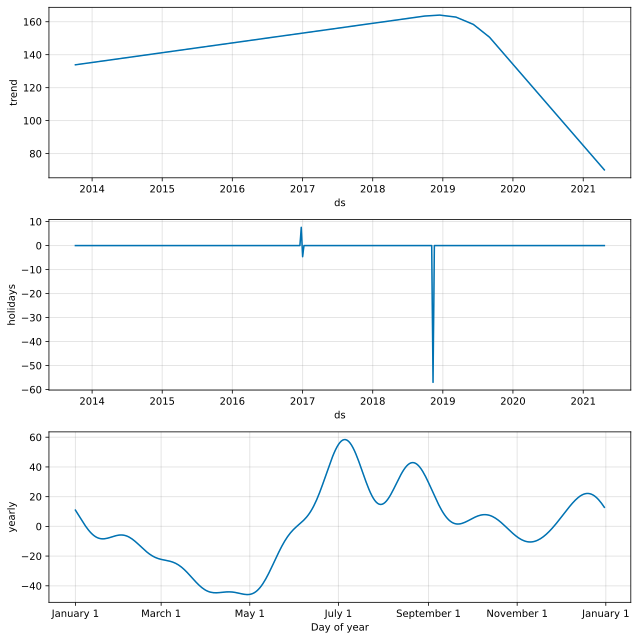

In [20]:
model2.plot_components(forecast2);

## **Avaliação dos modelos**

### **Modelo Diário**

In [21]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2017-02-27 00:00:00 and 2020-02-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-02-28,16.733297,4.970429,28.895272,17,2017-02-27
1,2017-03-01,14.298714,2.448761,26.525308,17,2017-02-27
2,2017-03-02,14.165786,1.884888,26.181719,20,2017-02-27
3,2017-03-03,15.627189,3.523653,27.767301,15,2017-02-27
4,2017-03-04,29.627500,17.400251,41.393085,21,2017-02-27


In [22]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,36 days 12:00:00,79.399903,8.910662,6.662807,0.263931,0.858824
1,37 days 00:00:00,80.898185,8.994342,6.725884,0.270407,0.855882
2,37 days 12:00:00,82.494086,9.082626,6.810413,0.278463,0.850980
3,38 days 00:00:00,85.599615,9.252006,6.945857,0.285048,0.843137
4,38 days 12:00:00,86.483040,9.299626,7.013869,0.288291,0.843137


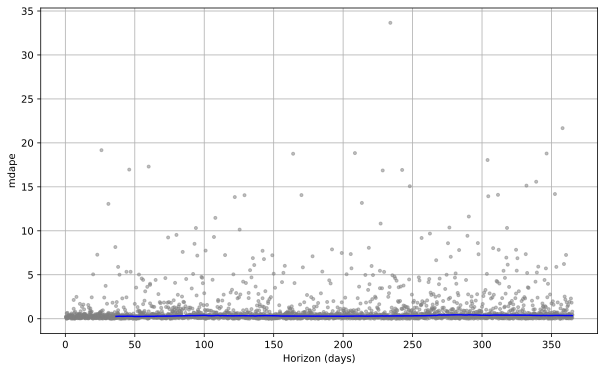

In [23]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')

### **Modelo Semanal**

INFO:fbprophet:Making 7 forecasts with cutoffs between 2017-03-01 00:00:00 and 2020-02-29 00:00:00



          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2017-03-05  129.917234   92.419081  164.755260  120 2017-03-01
1 2017-03-12  136.831964  101.292324  170.429755   73 2017-03-01
2 2017-03-19  140.158076  103.964037  175.186403  110 2017-03-01
3 2017-03-26  133.735666   99.772361  168.193008   96 2017-03-01
4 2017-04-02  123.098434   88.411568  157.242274  110 2017-03-01 

           horizon          mse       rmse  ...      mape     mdape  coverage
0 36 days 00:00:00  1556.340305  39.450479  ...  0.436830  0.146620  0.805556
1 36 days 12:00:00  1551.496427  39.389039  ...  0.435796  0.146620  0.805556
2 37 days 00:00:00  1545.486881  39.312681  ...  0.434074  0.146620  0.805556
3 37 days 12:00:00  1554.220352  39.423601  ...  0.436601  0.146620  0.805556
4 38 days 00:00:00  1510.172048  38.860932  ...  0.429533  0.132167  0.833333

[5 rows x 7 columns] 



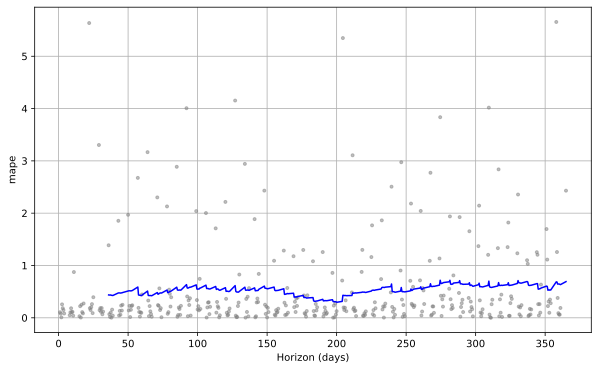

In [24]:
from fbprophet.diagnostics import cross_validation
df_cv2 = cross_validation(model2, horizon = '365 days')
print(df_cv2.head(), "\n")

from fbprophet.diagnostics import performance_metrics
df_p2 = performance_metrics(df_cv2)
print(df_p2.head(), "\n")

from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv2, metric='mape');

In [25]:
prophet_df2

,ds,y
0,2013-10-06,116
1,2013-10-13,185
2,2013-10-20,130
3,2013-10-27,116
4,2013-11-03,158
...,...,...
382,2021-01-31,81
383,2021-02-07,76
384,2021-02-14,62
385,2021-02-21,24


In [26]:
df_p2.mae

0      28.971120
1      28.800616
2      28.443953
3      28.906842
4      27.808790
         ...    
325    54.536588
326    54.559200
327    53.353625
328    52.213998
329    54.127391
Name: mae, Length: 330, dtype: float64

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>